In [142]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [144]:
df = pd.read_csv("HR_comma_sep.csv")
df


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [146]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [148]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [150]:
df.dropna()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [152]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

<h5>📊 About the Dataset</h5>
This dataset is related to employee information and HR analytics. It contains records of employees from a company with attributes such as:

satisfaction_level: Employee satisfaction score

last_evaluation: Last performance evaluation score

number_project: Number of projects the employee was involved in

average_montly_hours: Average monthly working hours

time_spend_company: Years spent in the company

Work_accident: Whether the employee had a work accident

left: Whether the employee left the company (1 = Yes, 0 = No)

promotion_last_5years: Whether the employee was promoted in the last 5 years

salary: Employee salary level (low, medium, high)

The purpose of this dataset is to understand employee behavior and segment employees using unsupervised learning (clustering). Specifically, K-Means clustering is applied to discover hidden patterns such as groups of employees likely to leave, overworked groups, or high-performing clusters.


In [154]:
#  Drop non-numeric 'Department' column
df = df.drop(columns=['Department'])
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,low
1,0.80,0.86,5,262,6,0,1,0,medium
2,0.11,0.88,7,272,4,0,1,0,medium
3,0.72,0.87,5,223,5,0,1,0,low
4,0.37,0.52,2,159,3,0,1,0,low
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,low
14995,0.37,0.48,2,160,3,0,1,0,low
14996,0.37,0.53,2,143,3,0,1,0,low
14997,0.11,0.96,6,280,4,0,1,0,low


In [131]:
salary_map = {"low":0,"medium":1, "high":2}
df["salary"] = df["salary"].map(salary_map)

In [133]:
salary_map

{'low': 0, 'medium': 1, 'high': 2}

In [135]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [156]:
df = df.dropna()

In [174]:
#  Separate features (all except 'left', the target column)
features = df.drop(columns=['left'])

# STEP 6: Scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

In [176]:
features

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Cluster
0,0.38,0.53,2,157,3,0,0,0,0
1,0.80,0.86,5,262,6,0,0,1,1
2,0.11,0.88,7,272,4,0,0,1,1
3,0.72,0.87,5,223,5,0,0,0,2
4,0.37,0.52,2,159,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,0
14995,0.37,0.48,2,160,3,0,0,0,0
14996,0.37,0.53,2,143,3,0,0,0,0
14997,0.11,0.96,6,280,4,0,0,0,1


In [200]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state= 42)
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [202]:
# STEP 8: Add cluster labels back to dataframe
df['Cluster'] = kmeans.labels_

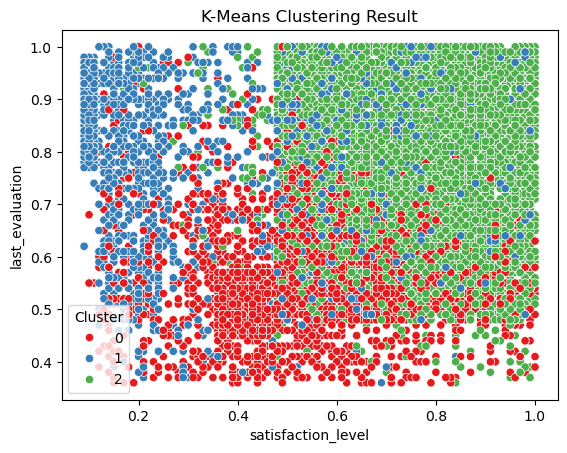

In [204]:
import seaborn as sns 
#  Visualize
sns.scatterplot(data=df, x='satisfaction_level', y='last_evaluation', hue='Cluster', palette='Set1')
plt.title("K-Means Clustering Result")
plt.show()

<h5>📌 Cluster Visualization Insight<?h5>
The image above represents the output of K-Means Clustering, where employees have been grouped into 3 distinct clusters based on their satisfaction, workload, evaluation score, and other HR-related features.

Each color shows a different cluster, and the cluster labels (0, 1, 2) represent:

Cluster 0: Employees who may be satisfied and stable – possibly average workload and low chance of leaving.

Cluster 1: Employees who are overworked or underperforming – possibly at higher risk of leaving or experiencing burnout.

Cluster 2: Employees with low satisfaction or low salary – may include those who have already left or are likely to leave.

📌 These labels are automatically generated by the model and don’t have a predefined meaning. We interpret them by analyzing the data patterns inside each cluster.

Using these insights, HR departments can:

Improve retention strategies

Identify at-risk employees

Balance workloads

And take targeted action for each group

<h3>🔍 What Does This Model Do?</h3>
This model uses the K-Means Clustering algorithm to analyze employee data and group employees into similar clusters based on their behavior and performance metrics.

✅ Purpose of the Model:
To group employees with similar patterns (like satisfaction, workload, promotions, accidents, etc.)

To identify patterns that can help HR departments improve decision-making

To detect employees who are likely to leave the company

To find potential risk groups, such as overworked or unsatisfied employees

🛠️ How It Works:
The model takes various features like satisfaction level, evaluation score, number of projects, hours worked, etc.

It scales the data to normalize the values.

Then it applies K-Means algorithm to divide the employees into 3 clusters.

Each cluster reveals a specific grouping behavior (like high satisfaction, high workload, or high attrition risk).

Finally, the clusters are visualized to give a clear picture of employee segmentation.

This unsupervised ML model helps in pattern discovery without needing predefined labels or outputs.